# Multiple Linear Regression
## GO-SHIP line P18

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd
import gsw

## Read in Cruise Data

In [2]:
# Step 1 download data from P18 cruise data
df=pd.read_csv('33RO20161119_hy1.csv',skiprows=149)
o2=df['OXYGEN'][1:-1]
no3=df['NITRAT'][1:-1]
dic=df['TCARBN'][1:-1]
sil=df['SILCAT'][1:-1]
p=df['CTDPRS'][1:-1]
t=df['CTDTMP'][1:-1]
sp=df['CTDSAL'][1:-1]
stn=df['STNNBR'][1:-1]
lat=df['LATITUDE'][1:-1]
lon=df['LONGITUDE'][1:-1]

In [3]:
# change data type to float
t=t.astype(float)
p=p.astype(float)
sp=sp.astype(float)

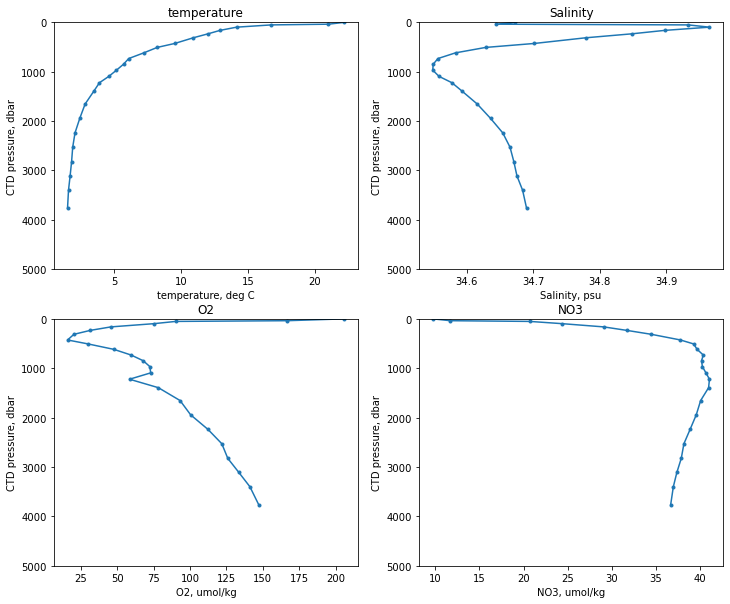

In [8]:
# quick look at a single station
ind = (stn==50)
plt.figure(figsize=(12,10))
# 
plt.subplot(221)
plt.plot(t[ind],p[ind],'.-')
plt.ylim([5000,0])
plt.xlabel('temperature, deg C')
plt.title('temperature')
plt.ylabel('CTD pressure, dbar')
# 
plt.subplot(222)
plt.plot(sp[ind],p[ind],'.-')
plt.ylim([5000,0])
plt.xlabel('Salinity, psu')
plt.title('Salinity')
plt.ylabel('CTD pressure, dbar')
# 
plt.subplot(223)
plt.plot(o2[ind].astype(float),p[ind],'.-')
plt.ylim([5000,0])
plt.xlabel('O2, umol/kg')
plt.title('O2')
plt.ylabel('CTD pressure, dbar')
# 
plt.subplot(224)
plt.plot(no3[ind].astype(float),p[ind],'.-')
plt.ylim([5000,0])
plt.xlabel('NO3, umol/kg')
plt.title('NO3')
plt.ylabel('CTD pressure, dbar')
plt.show()

### Can we use multiple linear regression to estimate NO3 as a function of (T,S,P,O2)?

In [36]:
## Use station 50 to establish a relationship 
# 
ind=(stn==50)
N=np.sum(ind)
A=np.ones((N,5))
b=np.zeros((N,1))
A[:,0]=t[ind]
A[:,1]=sp[ind]
A[:,2]=p[ind]
A[:,3]=o2[ind]
b=no3[ind].astype(float)
xvec=np.linalg.pinv(A)@b

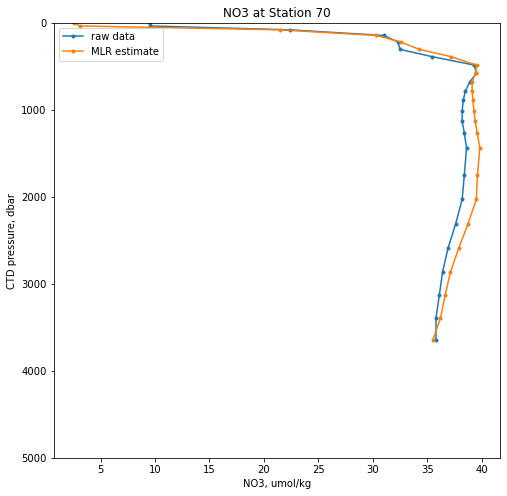

In [37]:
## validate using a station
# 
STN=70
ind = (stn==STN)
N=np.sum(ind)
A=np.ones((N,5))
A[:,0]=t[ind]
A[:,1]=sp[ind]
A[:,2]=p[ind]
A[:,3]=o2[ind]
cest=A@xvec
#
# quick look at a single station
plt.figure(figsize=(8,8))
plt.plot(no3[ind].astype(float),p[ind],'.-')
plt.plot(cest,p[ind],'.-')
plt.ylim([5000,0])
plt.xlabel('NO3, umol/kg')
plt.legend(['raw data','MLR estimate'])
plt.title('NO3 at Station '+str(STN))
plt.ylabel('CTD pressure, dbar')
plt.show()